# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [37]:
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url_get = requests.get('https://www.imdb.com/search/title/?release_date=2020-01-01,2020-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2020-01-01 and 2020-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t)'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('div', class_='lister-item mode-advanced')
print(table.prettify()[1:500])
#tr = table.find_all('div', attrs={'lister-item mode-advanced'})

div class="lister-item mode-advanced">
 <div class="lister-top-right">
  <div class="ribbonize" data-caller="filmosearch" data-tconst="tt10272386">
  </div>
 </div>
 <div class="lister-item-image float-left">
  <a href="/title/tt10272386/">
   <img alt="The Father" class="loadlate" data-tconst="tt10272386" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZGJhNWRiOWQtMjI4OS00ZjcxLTgwMTAtMzQ2ODkxY2JkOTVlXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-a


Do the scrapping process here (please change this markdown with your explanation)

In [19]:
temp = [] #initiating a tuple
page = requests.get('https://www.imdb.com/search/title/?release_date=2020-01-01,2020-12-31&start=1&ref_=adv_nxt')

table = soup.find_all('div', class_='lister-item mode-advanced')
for ia in table:
        #title
        title = ia.find('h3',class_='lister-item-header').find('a',href=True).text
        #print(title)

        # year
        year = ia.find('span',class_='lister-item-year text-muted unbold').text
        #print(year)

        # imdb_rat
        imdb = ia.find('div',class_="inline-block ratings-imdb-rating").strong.text
        #print(imdb)

        if ia.find('div',class_="inline-block ratings-metascore") is None:
            metascores=ia.find('div',class_="inline-block ratings-metascore")
        else :
            metascores=ia.find('div',class_="inline-block ratings-metascore").span.text
        #print(metascores)

        # votes
        votes = ia.find('p',class_='sort-num_votes-visible').text.split()[1]
        #print(votes)
        
        # duration
        if ia.find('p', class_="text-muted").find(class_="runtime") is None:
           duration = ia.find('p', class_="text-muted").find(class_="runtime")
        else:
           duration = ia.find('p', class_="text-muted").find(class_="runtime").text
        #print(duration)
        
        # genre
        genre = ia.find('span',class_='genre').text.strip()
        #print(genre)

        temp.append((title,year,imdb,metascores,votes,duration,genre))

In [20]:
from bs4 import BeautifulSoup 
import re 

# function to extract director and stars
def extract_director_star(text):
    split_result = re.sub("Director:|Stars:||\n|\s{2}", '', text).split('|')
    if len(split_result) == 2 :# ada director
        director = split_result[0]
    else: # tidak ada director
        director = None 

    star = split_result[-1]
    return director, star 

# get soup object 
url = 'https://www.imdb.com/search/title/?release_date=2020-01-01,2020-12-31&start=1&ref_=adv_nxt'
url_get = requests.get(url)
soup = BeautifulSoup(url_get.content,"html.parser")

# get all director and stars elements
director_stars = soup.find_all('p', {'class':''})
directors, stars = list(zip(*[extract_director_star(element.text) for element in director_stars]))

import pandas as pd 
# transform list object into dataframe
df_star_director = pd.DataFrame([stars, directors], index=['star', 'director']).T

## Creating data frame & Data wrangling

Put the array into dataframe

In [21]:
import pandas as pd

df = pd.DataFrame(temp,columns=('title','year','imdb','meta','votes','duration','genre'))
df['title']=df['title'].drop_duplicates()
df.dropna(how='any')
df.head(5)

,title,year,imdb,meta,votes,duration,genre
0,The Father,(I) (2020),8.3,88,"23,967",97 min,Drama
1,Snowpiercer,(2020– ),6.9,None,"34,381",60 min,"Action, Drama, Sci-Fi"
2,Promising Young Woman,(2020),7.5,72,"65,303",113 min,"Crime, Drama, Thriller"
3,Wonder Woman 1984,(2020),5.4,60,"188,720",151 min,"Action, Adventure, Fantasy"
4,Nomadland,(2020),7.5,93,"49,813",107 min,Drama


In [22]:
datas =pd.concat([df,df_star_director],axis=1)
datas.head(5)

,title,year,imdb,meta,votes,duration,genre,star,director
0,The Father,(I) (2020),8.3,88,"23,967",97 min,Drama,"Anthony Hopkins,Olivia Colman,Mark Gatiss,Oliv...",Florian Zeller
1,Snowpiercer,(2020– ),6.9,None,"34,381",60 min,"Action, Drama, Sci-Fi","Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...",None
2,Promising Young Woman,(2020),7.5,72,"65,303",113 min,"Crime, Drama, Thriller","Carey Mulligan,Bo Burnham,Alison Brie,Clancy B...",Emerald Fennell
3,Wonder Woman 1984,(2020),5.4,60,"188,720",151 min,"Action, Adventure, Fantasy","Gal Gadot,Chris Pine,Kristen Wiig,Pedro Pascal",Patty Jenkins
4,Nomadland,(2020),7.5,93,"49,813",107 min,Drama,"Frances McDormand,David Strathairn,Linda May,G...",Chloé Zhao


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion



7 most popular films of 2020

In [23]:
fix_datas = datas.dropna()

In [41]:
fix_datas['duration']= fix_datas['duration'].apply(str).str.replace("min","")
fix_datas['duration']= fix_datas['duration'].astype('int64')
fix_datas['rank_popularity']=range(1,len(fix_datas)+1)
fix_datas['imdb']=fix_datas['imdb'].astype('float64')
fix_datas['votes']=fix_datas['votes'].apply(str).str.replace(",","").astype('int64')
fix_datas['meta'] = fix_datas['meta'].fillna(0).astype('int64')

<ipython-input-41-60f15ff729bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_datas['duration']= fix_datas['duration'].apply(str).str.replace("min","")
<ipython-input-41-60f15ff729bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_datas['duration']= fix_datas['duration'].astype('int64')
<ipython-input-41-60f15ff729bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [42]:
genre = fix_datas['genre'].str.split(",",3,expand=True)
genre.head()

,0,1,2
0,Drama,None,None
2,Crime,Drama,Thriller
3,Action,Adventure,Fantasy
4,Drama,None,None
8,Action,Sci-Fi,Thriller


In [43]:
#for assign each genre
fix_datas['genre_1']=genre[0]
fix_datas['genre_2']=genre[1]
fix_datas['genre_3']=genre[2]

<ipython-input-43-50f42a297dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_datas['genre_1']=genre[0]
<ipython-input-43-50f42a297dbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_datas['genre_2']=genre[1]
<ipython-input-43-50f42a297dbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [44]:
# kondisi kolom
action = (fix_datas['genre_1']=="Action") | (fix_datas['genre_2']=="Action") | (fix_datas['genre_3']=="Action")
drama = (fix_datas['genre_1']=="Drama") | (fix_datas['genre_2']=="Drama") | (fix_datas['genre_3']=="Drama")
thriller = (fix_datas['genre_1']=="Thriller") | (fix_datas['genre_2']=="Thriller") | (fix_datas['genre_3']=="Thriller")

In [45]:
#membuat kolom baru berdasarkan kondisi
fix_datas['Action'] = np.where(action,'Yes','No')
fix_datas['Drama'] = np.where(drama,'Yes','No')
fix_datas['Thriller'] = np.where(thriller,'Yes','No')

<ipython-input-45-4ed30c2ab8bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_datas['Action'] = np.where(action,'Yes','No')
<ipython-input-45-4ed30c2ab8bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_datas['Drama'] = np.where(drama,'Yes','No')
<ipython-input-45-4ed30c2ab8bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [46]:
fix_datas.head()

,title,year,imdb,meta,votes,duration,genre,star,director,genre_1,genre_2,genre_3,Action,Drama,Thriller,rank_popularity
0,The Father,(I) (2020),8.3,88,23967,97,Drama,"Anthony Hopkins,Olivia Colman,Mark Gatiss,Oliv...",Florian Zeller,Drama,None,None,No,Yes,No,1
2,Promising Young Woman,(2020),7.5,72,65303,113,"Crime, Drama, Thriller","Carey Mulligan,Bo Burnham,Alison Brie,Clancy B...",Emerald Fennell,Crime,Drama,Thriller,No,No,No,2
3,Wonder Woman 1984,(2020),5.4,60,188720,151,"Action, Adventure, Fantasy","Gal Gadot,Chris Pine,Kristen Wiig,Pedro Pascal",Patty Jenkins,Action,Adventure,Fantasy,Yes,No,No,3
4,Nomadland,(2020),7.5,93,49813,107,Drama,"Frances McDormand,David Strathairn,Linda May,G...",Chloé Zhao,Drama,None,None,No,Yes,No,4
8,Tenet,(2020),7.5,69,326424,150,"Action, Sci-Fi, Thriller","John David Washington,Robert Pattinson,Elizabe...",Christopher Nolan,Action,Sci-Fi,Thriller,Yes,No,No,5



(Analisi Hubungan antara rating imdb dengan votes dan durasi film.)

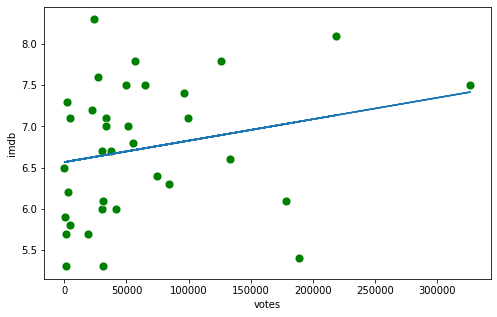

In [47]:
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
m, b = np.polyfit(fix_datas['votes'],fix_datas['imdb'],1)
sns.scatterplot(data=fix_datas, x='votes', y='imdb',s=80, ax=ax, color='green')
plt.plot(fix_datas['votes'],m*fix_datas['votes']+b)

hubgungan antara votes imbd menunjukan adanya hubungan bahwa votes memiliki pengaruh terhadap imbdb

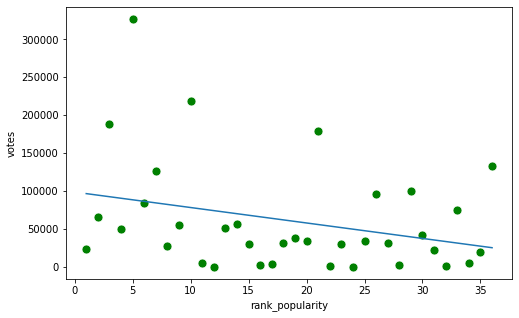

In [48]:
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
m, b = np.polyfit(fix_datas['rank_popularity'],fix_datas['votes'],1)
sns.scatterplot(data=fix_datas, x='rank_popularity', y='votes',s=80, ax=ax, color='green')
plt.plot(fix_datas['rank_popularity'],m*fix_datas['rank_popularity']+b)

Berdasarkan popularitas peringkat dan total votes, ini juga mencerminkan sedikit hubungan bahwa votes yang lebih tinggi akan meningkatkan popularitas film

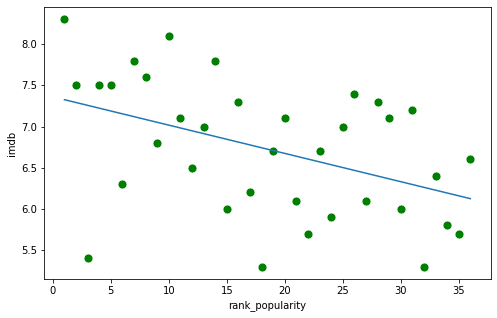

In [56]:
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
m, b = np.polyfit(fix_datas['rank_popularity'],fix_datas['imdb'],1)
sns.scatterplot(data=fix_datas, x='rank_popularity', y='imdb',s=80, ax=ax, color='green')
plt.plot(fix_datas['rank_popularity'],m*fix_datas['rank_popularity']+b)

In [51]:
wlwlwl

Kemudian jika kita mengurutkan berdasarkan peringkat popularitas dari IMDb, itu juga mencerminkan sedikit hubungan bahwa peringkat IMDb yang lebih tinggi akan meningkatkan popularitas film

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.